<a href="https://colab.research.google.com/github/febriantimayori/PCVK_Ganjil_2024/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 9 – Morfologi (Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)**

---


> Nama: Febrianti Mayori

> NIM: 2241720248

> Kelas: TI-3D

## **TUGAS PRAKTIKUM**

---


**1. Buka Google Colab, kemudian import folder yang ada di Drive Anda.**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-9 berikut.**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:**

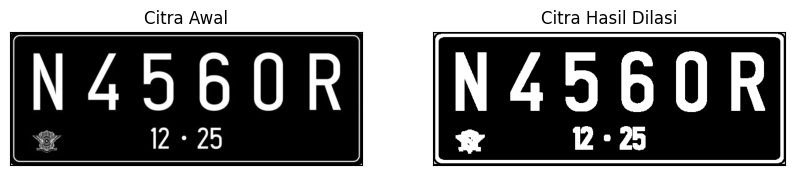

In [107]:
# Dilasi tanpa library

# Fungsi untuk melakukan dilasi
def dilasi_citra(F, w):
    # Ukuran citra
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Membuat structuring element dilasi (SED) berbentuk square (w x w)
    SED = np.ones((w, w), dtype=np.uint8)
    constant1 = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant1, p - constant1):
        for j in range(constant1, q - constant1):
            # Mengambil bagian citra yang sesuai dengan SED
            temp = F[i - constant1:i + constant1 + 1, j - constant1:j + constant1 + 1]

            # Melakukan operasi dilasi
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Membaca dan memproses gambar
img_d = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)

# Parameter dilasi
w = 5
imgD = dilasi_citra(thresh, w)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])

plt.show()

**4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:**

Kernel:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]


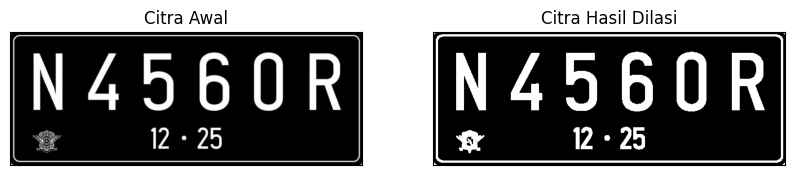

In [109]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)
#img = cv2.imread('morp.jpg', 0)

# Melakukan threshold untuk membuat gambar biner
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

# Membuat kernel untuk dilasi
kernel = np.ones((3, 3), np.uint16)
# Melakukan operasi dilasi
dilasi = cv2.dilate(thresh, kernel, iterations=1)
print("Kernel:\n", kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(dilasi, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])

plt.show()

**5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:**

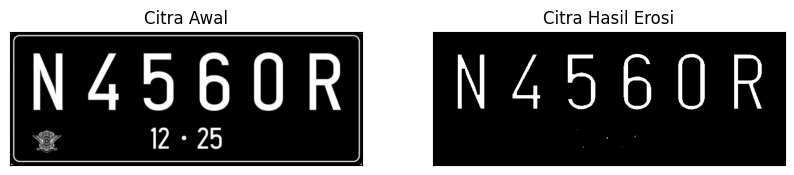

In [110]:
# Erosi Tanpa Library

# Fungsi untuk melakukan erosi
def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape

    # Membuat elemen struktur erosi (SE) berbentuk square (k x k)
    SE = np.ones((k, k), dtype=np.uint8)
    constant = (k - 1) // 2

    # Membuat output citra erosi
    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            # Mengambil bagian citra sesuai dengan SE
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]

            # Operasi erosi: memilih nilai minimum dalam area SE
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Membaca gambar
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)

# Melakukan threshold untuk membuat gambar biner
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)

# Parameter erosi
k = 5
imgE = erosi_citra(thresh1, k)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

**6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:**

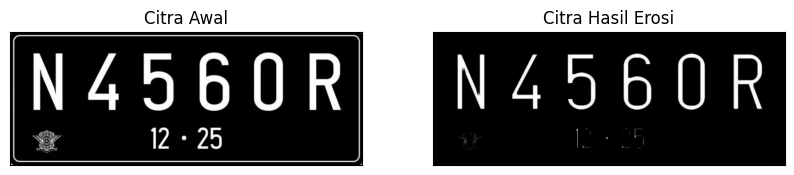

In [111]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg')

# Membuat kernel untuk erosi
kernel = np.ones((5, 5), np.uint8)

# Melakukan operasi erosi pada citra
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img)
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(erosion)
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])

plt.show()

**7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:**

* Operasi Opening tanpa menggunakan Library Morphology

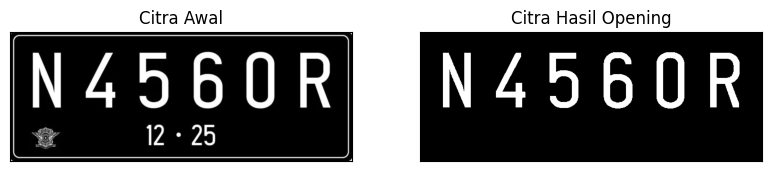

In [112]:
# Membaca gambar dan melakukan threshold
img_o = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)
ret_o, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)

# Parameter kernel untuk operasi
k = 7

# Melakukan operasi opening (erosi diikuti dengan dilasi)
imgO = dilasi_citra(erosi_citra(thresho, k), k)

# Menampilkan citra asli dan hasil operasi opening
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img_o, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])

plt.show()

*  Operasi Opening dengan menggunakan Library Morphology



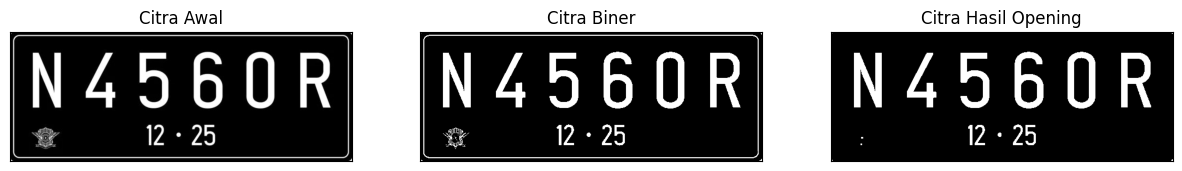

In [113]:
# Dengan menggunakan library

# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)

# Melakukan thresholding untuk menghasilkan citra biner
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

# Membuat kernel untuk operasi morfologi
kernel = np.ones((3, 3), np.uint8)

# Melakukan operasi opening
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Menampilkan citra asli, citra biner, dan hasil opening
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening')
plt.xticks([]), plt.yticks([])

plt.show()

**8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini:**

* Operasi Closing tanpa menggunakan Library Morphology

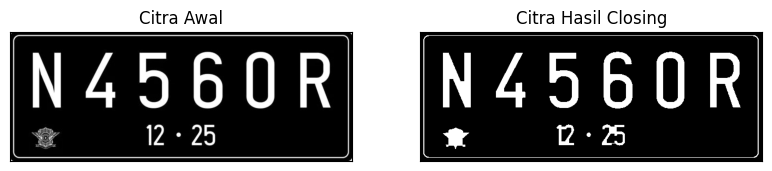

In [114]:
# Membaca gambar dalam mode grayscale
img_c = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)

# Melakukan thresholding untuk menghasilkan citra biner
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)

# Ukuran kernel untuk operasi closing
k = 7

# Melakukan operasi closing (dilasi diikuti dengan erosi)
imgC = erosi_citra(dilasi_citra(threshc, k), k)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img_c, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(imgC, cmap='gray')
plt.title('Citra Hasil Closing')
plt.xticks([]), plt.yticks([])

plt.show()

* Operasi Closing dengan menggunakan Library Morphology

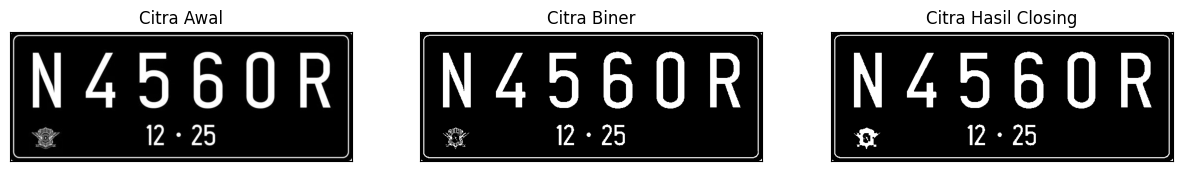

In [115]:
# Membaca gambar dalam mode grayscale
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)

# Melakukan thresholding untuk menghasilkan citra biner
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)

# Membuat kernel untuk operasi closing
kernel = np.ones((3, 3), np.uint8)
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Menampilkan citra awal, citra biner, dan hasil closing
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner')
plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing')
plt.xticks([]), plt.yticks([])

plt.show()

**9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:**

SED = Cross 3x3


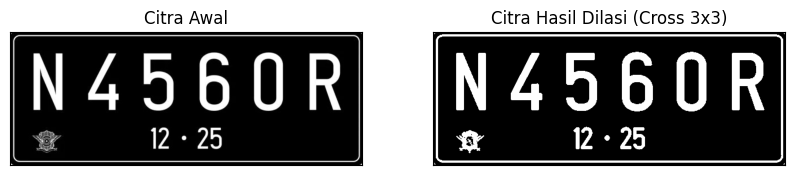

SED = Cross 5x5


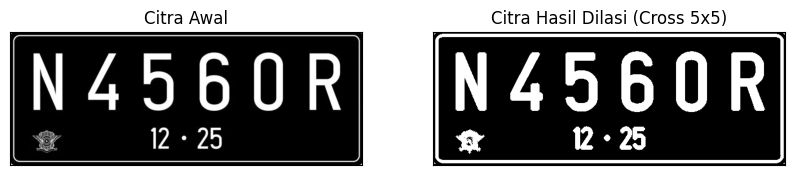

In [116]:
# Dilasi Cross SED

def dilasi_citra(F, SED):
    # Ukuran citra
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate structure element dilasi (SED)
    w = SED.shape[0]
    constant = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            # Mengambil bagian citra yang sesuai dengan SE
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Membaca gambar
img_d = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)

# Struktur elemen cross 3x3
SED3 = np.array([[0, 1, 0],
                 [1, 1, 1],
                 [0, 1, 0]], dtype=np.uint8)

# Struktur elemen cross 5x5
SED5 = np.array([[0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0],
                 [1, 1, 1, 1, 1],
                 [0, 0, 1, 0, 0],
                 [0, 0, 1, 0, 0]], dtype=np.uint8)

# Proses dilasi dengan SED 3x3
print('SED = Cross 3x3')
imgD3 = dilasi_citra(thresh, SED3)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD3, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 3x3)'), plt.xticks([]), plt.yticks([])
plt.show()

# Proses dilasi dengan SED 5x5
print('SED = Cross 5x5')
imgD5 = dilasi_citra(thresh, SED5)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD5, cmap='gray')
plt.title('Citra Hasil Dilasi (Cross 5x5)'), plt.xticks([]), plt.yticks([])
plt.show()

**10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:**

SED = Circle 3x3


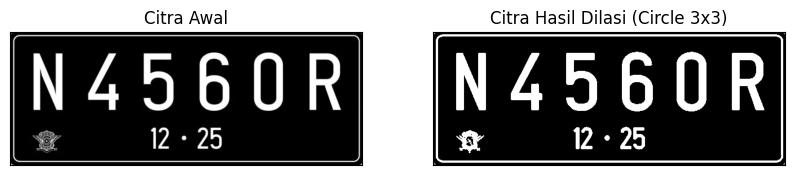

SED = Circle 5x5


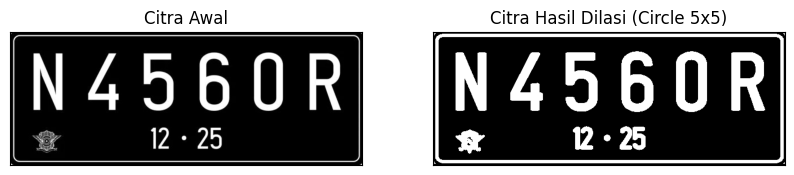

In [117]:
# Dilasi Circular SED

def dilasi_citra(F, w):
    # Ukuran citra
    p, q = F.shape
    imgD = np.zeros((p, q), dtype=np.uint8)

    # Generate struktur elemen dilasi (SED)
    SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
    constant = (w - 1) // 2

    # Proses Dilasi
    for i in range(constant, p - constant):
        for j in range(constant, q - constant):
            # Mengambil bagian citra yang sesuai dengan SE
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SED
            imgD[i, j] = np.max(product)

    return imgD

# Membaca gambar
img_d = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)

# Dilasi dengan SED berbentuk lingkaran ukuran 3x3
print('SED = Circle 3x3')
w = 3
imgD3 = dilasi_citra(thresh, w)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD3, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 3x3)'), plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi dengan SED berbentuk lingkaran ukuran 5x5
print('SED = Circle 5x5')
w = 5
imgD5 = dilasi_citra(thresh, w)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD5, cmap='gray')
plt.title('Citra Hasil Dilasi (Circle 5x5)'), plt.xticks([]), plt.yticks([])
plt.show()

**11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:**

SE = Rectangle 3x5


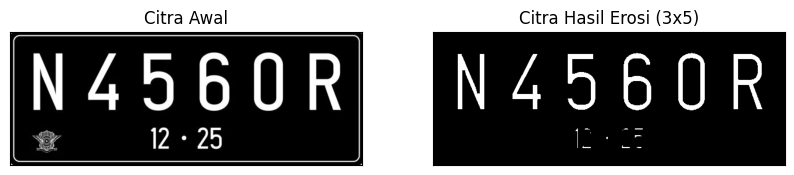

SE = Rectangle 5x7


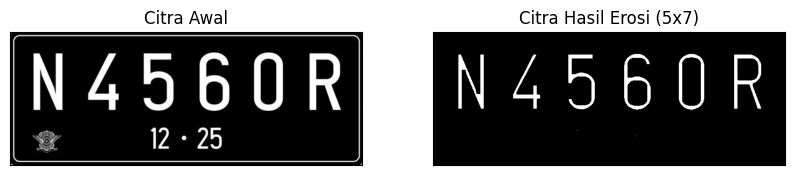

In [118]:
# Erosi Cross SE

def erosi_citra(F, p, l):
    # Ukuran citra
    m, n = F.shape

    # Generate struktur elemen erosi (SE)
    SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p, l))  # SE persegi panjang
    constant1 = (l - 1) // 2
    constant2 = (p - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant1, m - constant1):
        for j in range(constant2, n - constant2):
            temp = F[i - constant1:i + constant1 + 1, j - constant2:j + constant2 + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Erosi dengan SE berbentuk persegi panjang ukuran 3x5
print('SE = Rectangle 3x5')
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p = 5
l = 3
imgE1 = erosi_citra(thresh1, p, l)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgE1, cmap='gray')
plt.title('Citra Hasil Erosi (3x5)'), plt.xticks([]), plt.yticks([])
plt.show()

# Erosi dengan SE berbentuk persegi panjang ukuran 5x7
print('SE = Rectangle 5x7')
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/platnomer.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p = 7
l = 5
imgE2 = erosi_citra(thresh1, p, l)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgE2, cmap='gray')
plt.title('Citra Hasil Erosi (5x7)'), plt.xticks([]), plt.yticks([])
plt.show()

**12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)**

SE = Line Vertikal 3


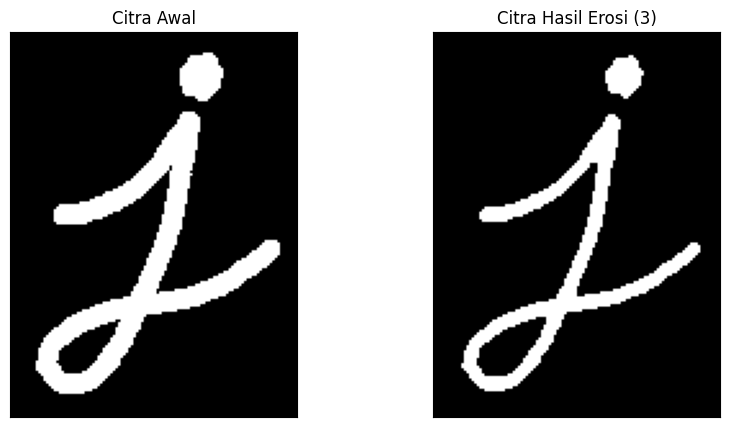

SE = Line Vertikal 5


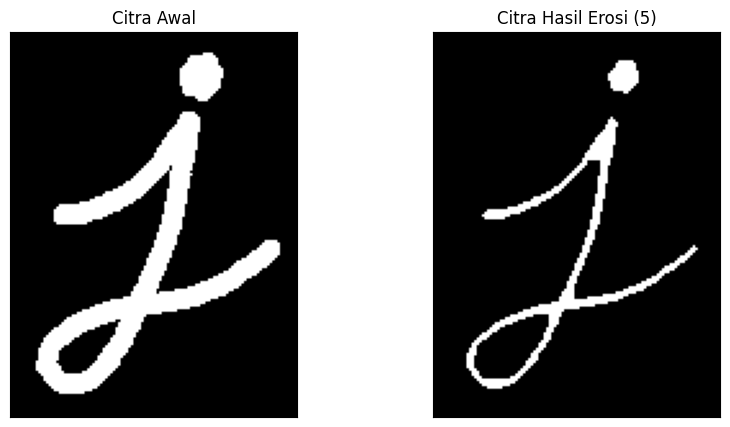

In [119]:
# Erosi Line Vertikal SE

def erosi_citra(F, k):
    # Ukuran citra
    m, n = F.shape

    # Generate struktur elemen erosi (SE) dengan bentuk garis vertikal
    SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, k))
    constant = (k - 1) // 2

    imgE = np.zeros((m, n), dtype=np.uint8)

    # Proses Erosi
    for i in range(constant, m - constant):
        for j in range(constant, n - constant):
            temp = F[i - constant:i + constant + 1, j - constant:j + constant + 1]
            product = temp * SE
            imgE[i, j] = np.min(product)

    return imgE

# Erosi dengan SE berbentuk garis vertikal ukuran 3
print('SE = Line Vertikal 3')
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k = 3
imgE1 = erosi_citra(thresh1, k)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgE1, cmap='gray')
plt.title('Citra Hasil Erosi (3)'), plt.xticks([]), plt.yticks([])
plt.show()

# Erosi dengan SE berbentuk garis vertikal ukuran 5
print('SE = Line Vertikal 5')
img_e = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k = 5
imgE2 = erosi_citra(thresh1, k)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgE2, cmap='gray')
plt.title('Citra Hasil Erosi (5)'), plt.xticks([]), plt.yticks([])
plt.show()

**13. TopHat**

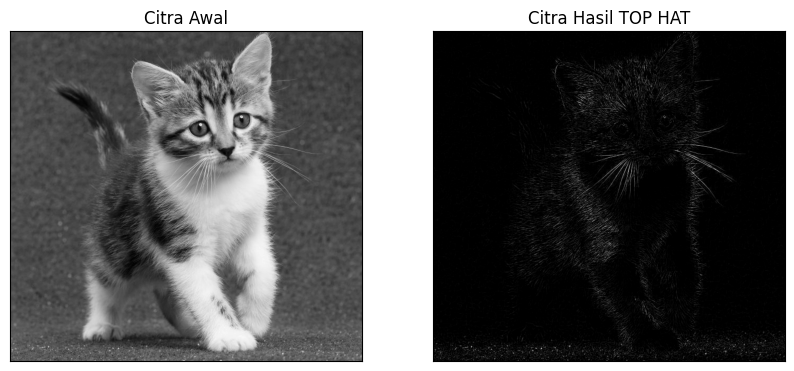

In [120]:
# Mendapatkan kernel yang akan digunakan dalam Top-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menerapkan operasi Top-Hat
tophat_img = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

**14. BlackHat**

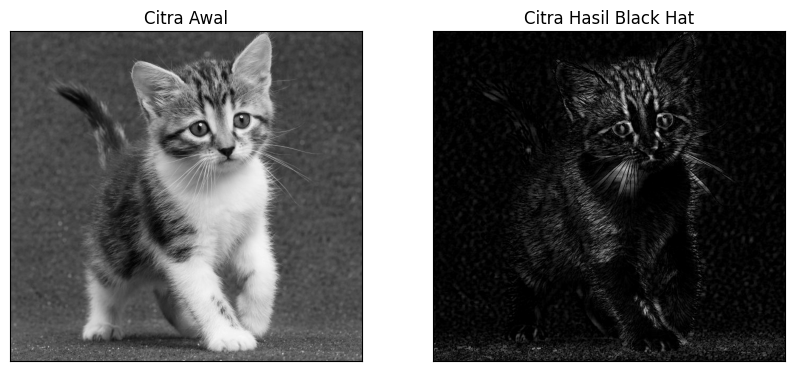

In [121]:
# Mendapatkan kernel yang akan digunakan dalam Black-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menerapkan operasi Black-Hat
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat_img = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, Kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_gray, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blackhat_img, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

**15. Skeleton**

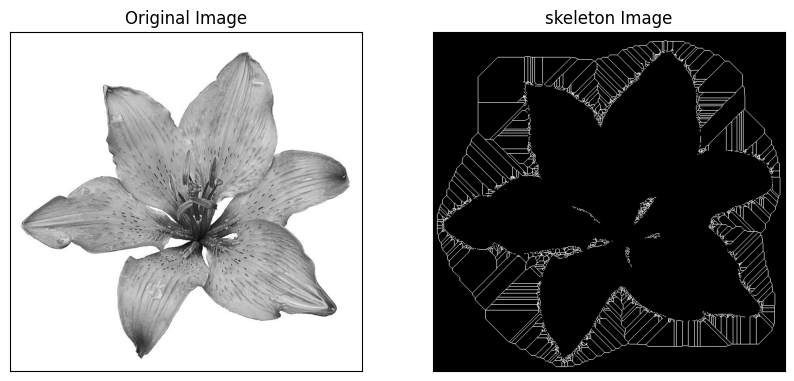

In [122]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)
binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()

**16. Skeleton Inverse**

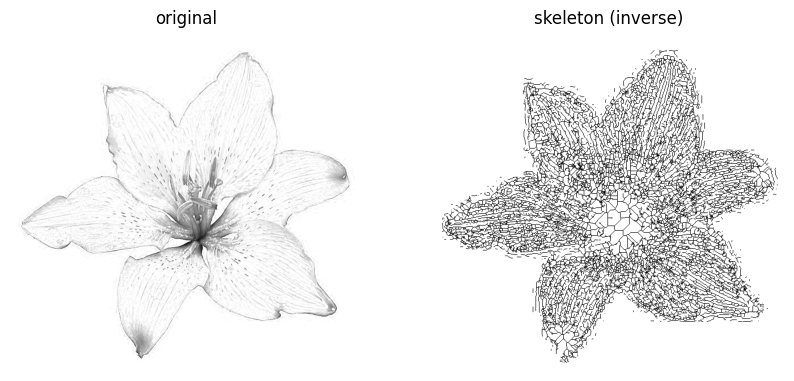

In [123]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

**17. Thickening**

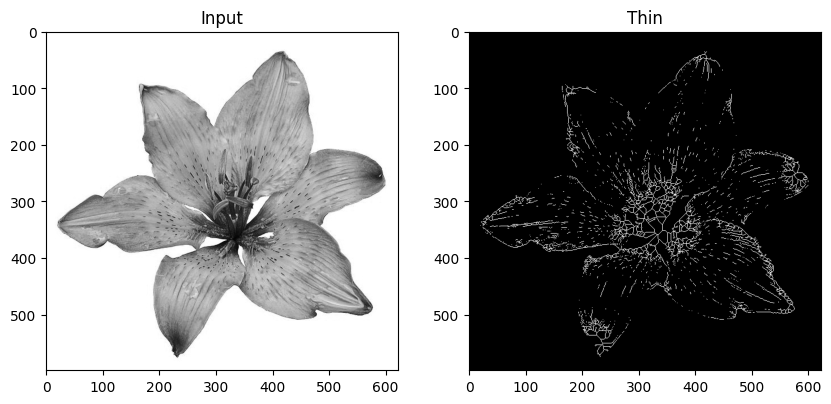

In [124]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

## **TUGAS PRAKTIKUM MORFOLOGI**

---


Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra tersebut.

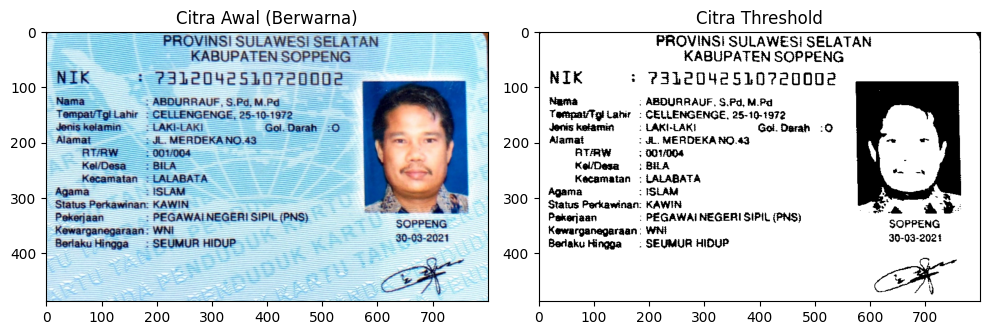

In [125]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Muat citra KTP dalam format warna untuk ditampilkan
img_color = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp2.jpg')  # Citra berwarna
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # Ubah dari BGR ke RGB

# Muat citra KTP dalam format grayscale untuk pemrosesan
img_gray = cv2.imread('/content/drive/MyDrive/PCVK/Images/ktp2.jpg', 0)  # Citra grayscale
_, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Menampilkan citra berwarna dan citra threshold secara horizontal
plt.figure(figsize=(10, 5))

# Menampilkan citra berwarna
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Citra Awal (Berwarna)")

# Menampilkan citra threshold
plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.tight_layout()  # Mengatur layout agar rapi
plt.show()

### **Dilasi**

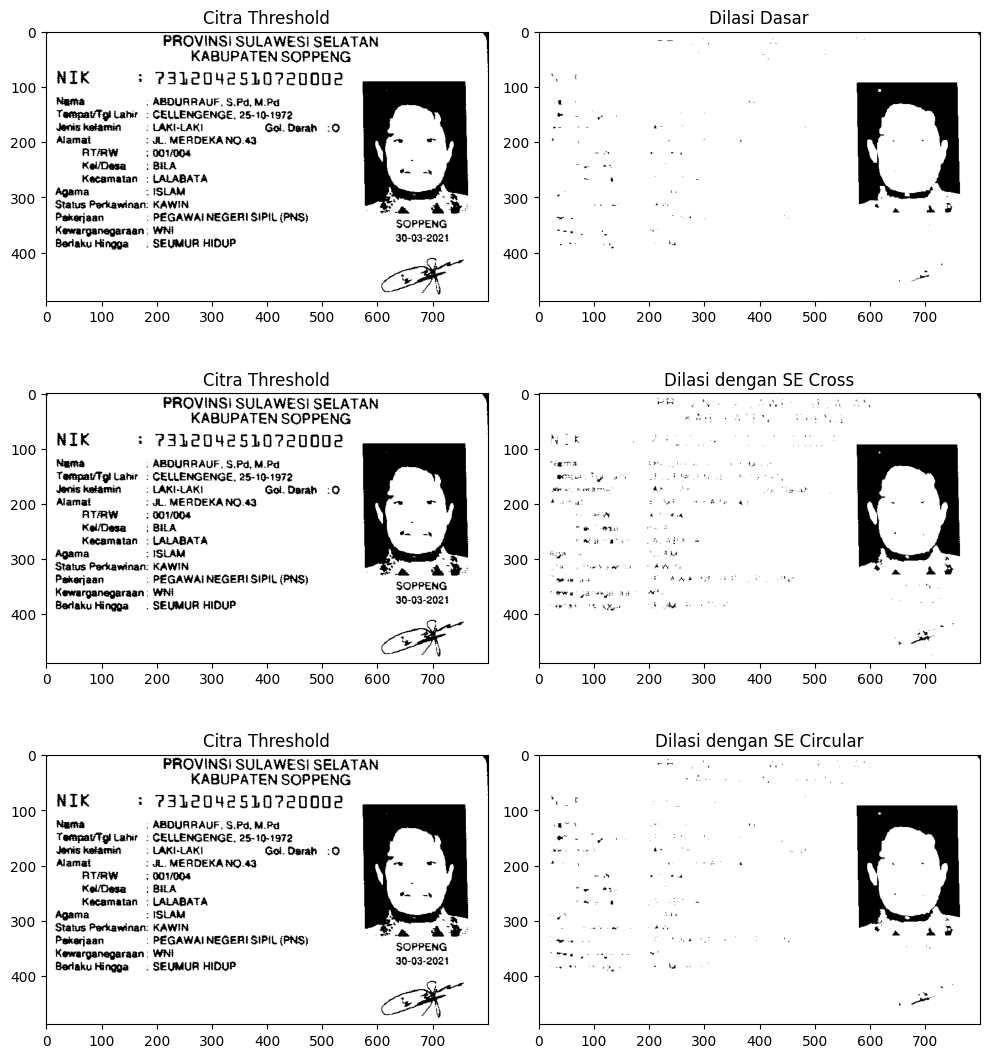

In [126]:
# Mengatur kernel untuk berbagai operasi dilasi
kernel = np.ones((5, 5), np.uint8)
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
kernel_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan dilasi
dilated = cv2.dilate(thresh, kernel, iterations=1)
dilated_cross = cv2.dilate(thresh, kernel_cross, iterations=1)
dilated_circular = cv2.dilate(thresh, kernel_circular, iterations=1)

# Menampilkan hasil
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold dan hasil dilasi dasar
plt.subplot(3, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title("Dilasi Dasar")

# Menampilkan citra threshold dan hasil dilasi dengan SE Cross
plt.subplot(3, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 4)
plt.imshow(dilated_cross, cmap='gray')
plt.title("Dilasi dengan SE Cross")

# Menampilkan citra threshold dan hasil dilasi dengan SE Circular
plt.subplot(3, 2, 5)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 6)
plt.imshow(dilated_circular, cmap='gray')
plt.title("Dilasi dengan SE Circular")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

### **Erosi**

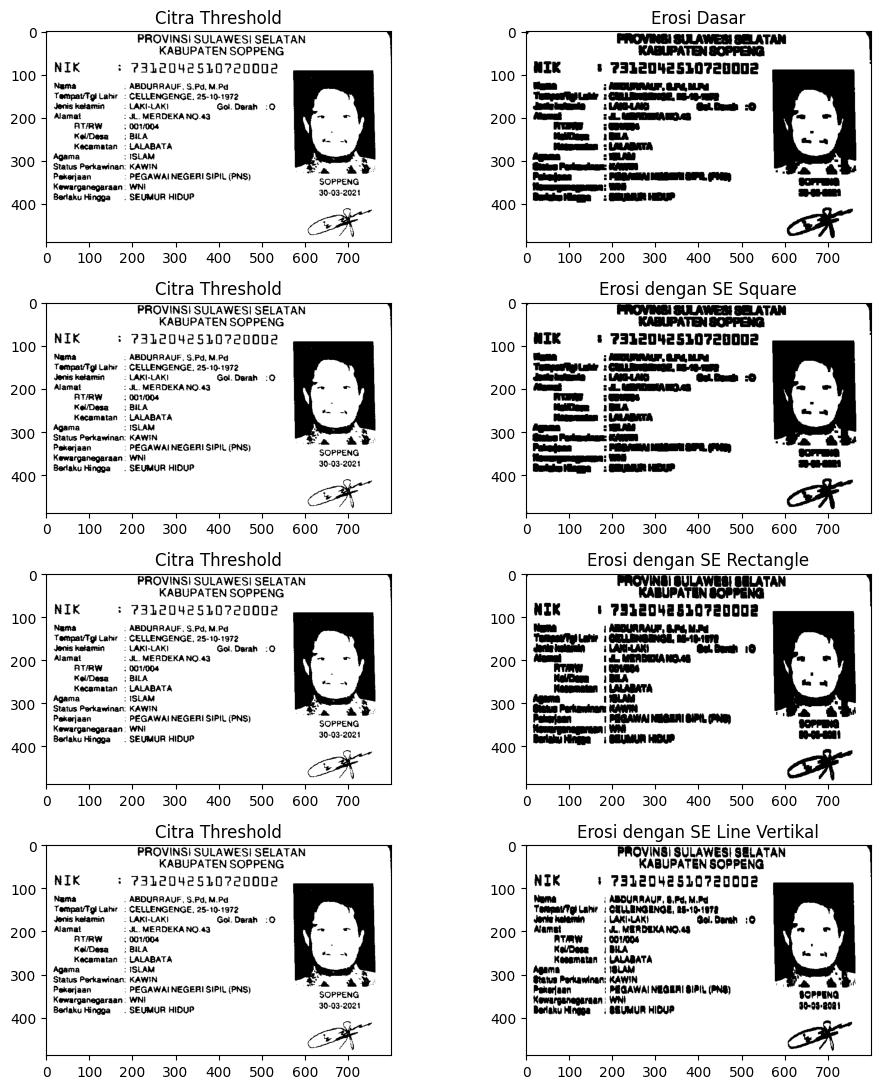

In [127]:
# Mengatur kernel untuk berbagai operasi erosi
kernel = np.ones((5, 5), np.uint8)  # Erosi dasar
kernel_square = np.ones((5, 5), np.uint8)  # Erosi dengan kernel square
kernel_rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 7))  # Erosi dengan kernel rectangle
kernel_line_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))  # Erosi dengan kernel line vertikal

# Melakukan erosi
eroded = cv2.erode(thresh, kernel, iterations=1)  # Erosi dasar
eroded_square = cv2.erode(thresh, kernel_square, iterations=1)  # Erosi dengan kernel square
eroded_rectangle = cv2.erode(thresh, kernel_rectangle, iterations=1)  # Erosi dengan kernel rectangle
eroded_line_vertical = cv2.erode(thresh, kernel_line_vertical, iterations=1)  # Erosi dengan kernel line vertikal

# Menampilkan hasil erosi
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold dan hasil erosi dasar
plt.subplot(4, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title("Erosi Dasar")

# Menampilkan citra threshold dan hasil erosi dengan kernel square
plt.subplot(4, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 4)
plt.imshow(eroded_square, cmap='gray')
plt.title("Erosi dengan SE Square")

# Menampilkan citra threshold dan hasil erosi dengan kernel rectangle
plt.subplot(4, 2, 5)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 6)
plt.imshow(eroded_rectangle, cmap='gray')
plt.title("Erosi dengan SE Rectangle")

# Menampilkan citra threshold dan hasil erosi dengan kernel line vertikal
plt.subplot(4, 2, 7)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(4, 2, 8)
plt.imshow(eroded_line_vertical, cmap='gray')
plt.title("Erosi dengan SE Line Vertikal")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

### **Operasi Opening**

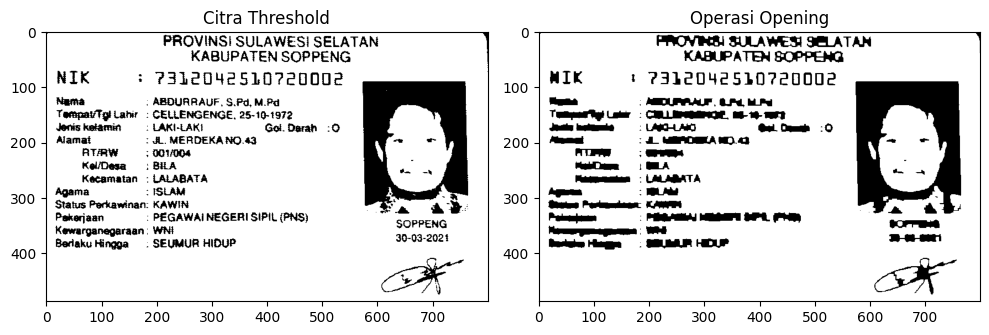

In [128]:
# Mengatur kernel untuk operasi Opening
kernel = np.ones((5, 5), np.uint8)

# Operasi Opening
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')
plt.title("Operasi Opening")

plt.tight_layout()
plt.show()

### **Operasi Closing**

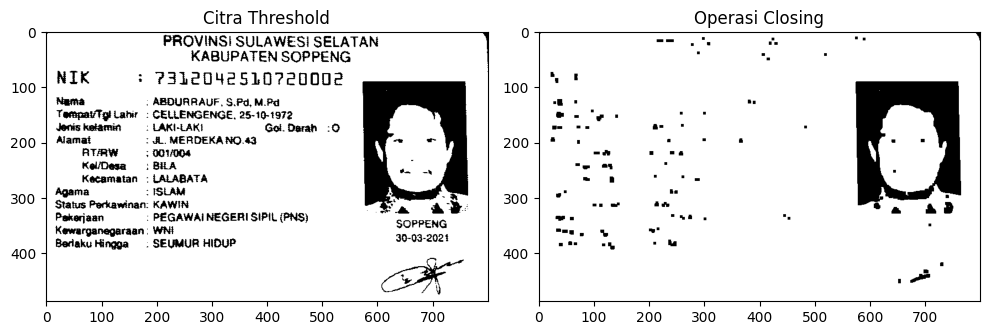

In [129]:
# Mengatur kernel untuk operasi Closing
kernel = np.ones((5, 5), np.uint8)

# Operasi Closing
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')
plt.title("Operasi Closing")

plt.tight_layout()
plt.show()

### **Skeleton**

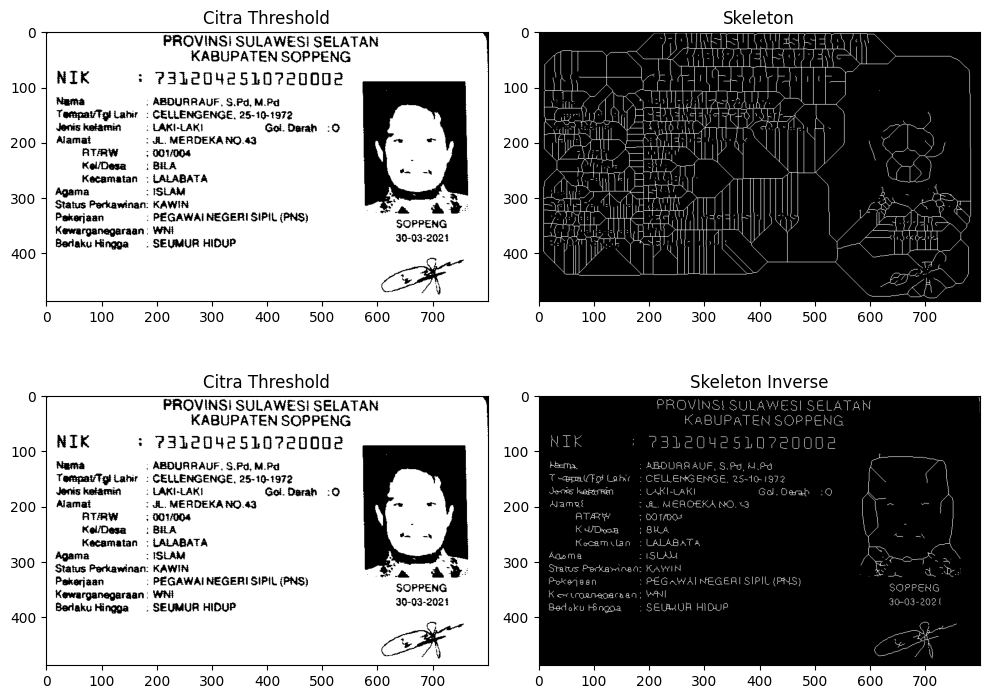

In [130]:
# Menghitung Skeleton
binary = thresh > 127  # Citra biner
skeleton = skeletonize(binary)
skeleton_inv = skeletonize(~binary)  # Inverse Skeleton

# Menampilkan hasil
plt.figure(figsize=(10, 11))

# Menampilkan citra threshold
plt.subplot(3, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title("Skeleton")

# Menampilkan citra threshold untuk Skeleton Inverse
plt.subplot(3, 2, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(3, 2, 4)
plt.imshow(skeleton_inv, cmap='gray')
plt.title("Skeleton Inverse")

plt.tight_layout()  # Mengatur agar tampilan tidak bertumpuk
plt.show()

### **TopHat**

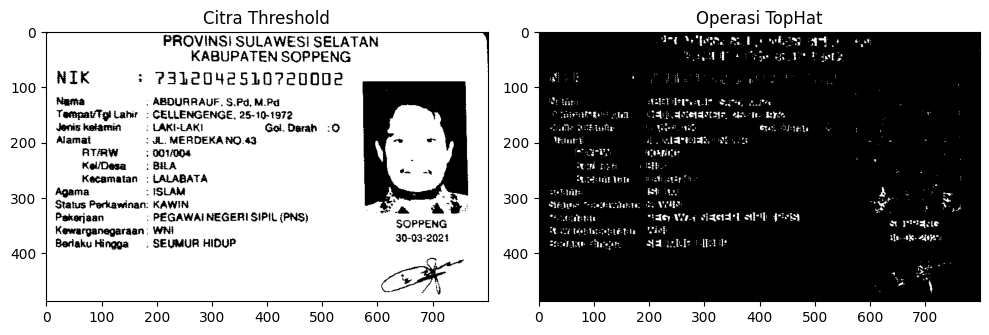

In [131]:
# Mengatur kernel untuk operasi TopHat
kernel = np.ones((5, 5), np.uint8)

# Operasi TopHat
tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(tophat, cmap='gray')
plt.title("Operasi TopHat")

plt.tight_layout()
plt.show()

### **BlackHat**

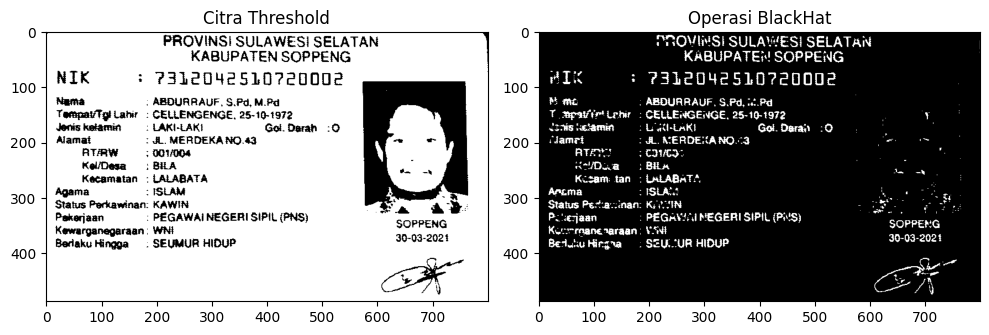

In [132]:
# Mengatur kernel untuk operasi BlackHat
kernel = np.ones((5, 5), np.uint8)

# Operasi BlackHat
blackhat = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(blackhat, cmap='gray')
plt.title("Operasi BlackHat")

plt.tight_layout()
plt.show()

### **Thickening**

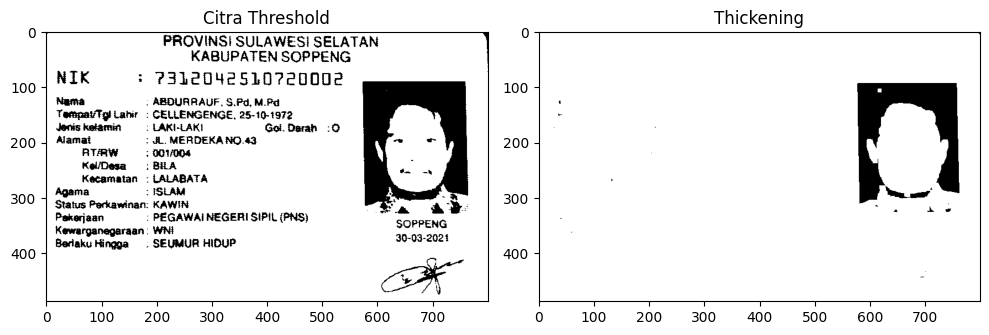

In [133]:
# Operasi Thickening menggunakan dilasi berulang
kernel = np.ones((3, 3), np.uint8)
thickened = cv2.dilate(thresh, kernel, iterations=3)  # Dilasi berulang

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title("Citra Threshold")

plt.subplot(1, 2, 2)
plt.imshow(thickened, cmap='gray')
plt.title("Thickening")

plt.tight_layout()
plt.show()